In [33]:
import sys
import os
sys.path.insert(0, os.path.abspath('/notebooks/pytorch_timeseries'))

from torch_timeseries.experiments.hstgnn_experimentv3 import HSTGNNv3Experiment
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment
from torch_timeseries.experiments.mtgnn_experiment import MTGNNExperiment
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import sys
import os
sys.path.insert(0, os.path.abspath('/notebooks/pytorch_timeseries'))


In [106]:
def count_parameters(model, print_fun=print):
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad:
            continue
        params = parameter.numel()
        total_params += params
    print_fun(f"Total Trainable Params: {total_params}")
    return total_params


# 1 multisteps

## data load

In [21]:
exp_for_testing_loader = HSTGNNv7Experiment(
    dataset_type="PEMS_BAY", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=1,
    horizon=1,
    graph_build_type="attsim_direc_tt_mask3_no_predefined", # mlpsim_direc_tt_mask
    latent_dim=32,
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=12,
    device=device,
)
seed = 233
exp_for_testing_loader._setup_run(seed)


train steps: 36458
val steps: 10400
test steps: 5189
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined


In [13]:
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment
import pandas as pd

device = 'cuda:0'
exp = HSTGNNv7Experiment(
    dataset_type="PEMS_BAY", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=1,
    graph_build_type="attsim_direc_tt_mask3_no_predefined", # mlpsim_direc_tt_mask
    # gcn_type='weighted_han_update3',
    # gcn_type='weighted_han_update3',
    # normalization=False,
    latent_dim=32,
    # conv_type='hetero',
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=12,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 233
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)

# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/METR_LA/w12h1s12/0befc310f4ef0507b86d6f22fefc633c')

train steps: 36458
val steps: 10400
test steps: 5189
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
result directory exists: ../results/runs/HSTGNNv7/PEMS_BAY/w12h1s12/a74aee3910bc25fb671475edccf1bfb4
resuming from ../results/runs/HSTGNNv7/PEMS_BAY/w12h1s12/a74aee3910bc25fb671475edccf1bfb4/run_checkpoint.pth


In [25]:
xs = []
ys = []
boys = []
xdes = []
ydes = []

for x, y, batch_origin_y, x_date_enc, y_date_enc in exp_for_testing_loader.dataloader.test_loader:
    xs.append(x)
    ys.append(y)
    boys.append(batch_origin_y)
    xdes.append(x_date_enc)
    ydes.append(y_date_enc)

    

In [31]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
# batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc

 average inference time: 0.01967046022415161


In [4]:
exp._process_one_batch(x, y, x_date_enc, y_date_enc)

NameError: name 'x' is not defined

## STGCN

In [70]:
from torch_timeseries.experiments.stgcn_experiment import STGCNExperiment
import pandas as pd

device = 'cuda:0'
exp = STGCNExperiment(
    dataset_type="PEMS_BAY", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=1,
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=12,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
# exp.run(seed)
# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/MTGNN/PEMS_BAY/w12h1s12/ae9ae336bb8798c76d91d84448660ac8')

train steps: 36458
val steps: 10400
test steps: 5189
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/STGCN1/PEMS_BAY/w12h1s12/764fe9c690d2fb0095f9445b12c5fe8b
resuming from ../results/runs/STGCN1/PEMS_BAY/w12h1s12/764fe9c690d2fb0095f9445b12c5fe8b/run_checkpoint.pth


In [78]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)
# batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc

 average inference time: 0.004490013122558594
100


## GMAN

In [89]:
from torch_timeseries.experiments.GMAN_experiment import GMANExperiment
from torch_timeseries.experiments.experiment import count_parameters
import pandas as pd

device = 'cuda:0'
exp = GMANExperiment(
    dataset_type="PEMS_BAY", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=1,
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=12,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
print(f"parameters: {count_parameters(exp.model)}")
    
# exp.run(seed)
# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/MTGNN/PEMS_BAY/w12h1s12/ae9ae336bb8798c76d91d84448660ac8')

train steps: 36458
val steps: 10400
test steps: 5189
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/GMAN1/PEMS_BAY/w12h1s12/161d9dc7429e55af2500d64702dbb973
+---------------------------------------------------------------------------------------+------------+
|                                        Modules                                        | Parameters |
+---------------------------------------------------------------------------------------+------------+
|              _st_embedding._fully_connected_se._conv2ds.0._conv2d.weight              |    4096    |
|               _st_embedding._fully_connected_se._conv2ds.0._conv2d.bias               |     64     |
|            _st_embedding._fully_connected_se._conv2ds.0._batch_norm.weight            |     64     |
|             _st_embedding._fully_connected_se._conv2ds.0._batch_norm.bias             |     64     |
|              _st_embedding._fully_connected_se._conv2ds.1._conv2d.weight              

/notebooks/pytorch_timeseries/torch_timeseries/experiments/GMAN_experiment.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_index = torch.tensor(self.edge_index).to(self.device)
/notebooks/pytorch_timeseries/torch_timeseries/experiments/GMAN_experiment.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_weight = torch.tensor(self.edge_weight).to(self.device)


In [91]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")

# batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc

 average inference time: 0.01931732177734375


## MTGNN

In [68]:
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment
import pandas as pd

device = 'cuda:0'
exp = MTGNNExperiment(
    dataset_type="PEMS_BAY", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=1,
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    layer_norm_affline=True,
    windows=12,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
exp.run(seed)
# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/MTGNN/PEMS_BAY/w12h1s12/ae9ae336bb8798c76d91d84448660ac8')

train steps: 36458
val steps: 10400
test steps: 5189
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/MTGNN/PEMS_BAY/w12h1s12/3ed6ffcd4ff6ff6bf3b1131e3995e34c
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/MTGNN/PEMS_BAY/w12h1s12/3ed6ffcd4ff6ff6bf3b1131e3995e34c
run : 0 in seed: 42
+-------------------------------+------------+
|            Modules            | Parameters |
+-------------------------------+------------+
| filter_convs.0.tconv.0.weight |    128     |
|  filter_convs.0.tconv.0.bias  |     4      |
| filter_convs.0.tconv.1.weight |    192     |
|  filter_convs.0.tconv.1.bias  |     4      |
| filter_convs.0.tconv.2.weight |    384     |
|  filter_convs.0.tconv.2.bias  |     4      |
| filter_convs.0.tconv.3.weight |    448     |
|  filter_convs.0.tconv.3.bias  |     4      |
| filter_convs.1.tconv.0.weight |    128     |
|  filter_convs.1.tconv.0.bias  |     4      |
| filter_convs.1.tconv.1.weight |    192

  0%|          | 0/36458 [00:00<?, ?it/s]Exception ignored in: <function _releaseLock at 0x7fe8cce69af0>
Traceback (most recent call last):
  File "/root/anaconda3/envs/py38/lib/python3.8/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
Exception ignored in: <function _releaseLock at 0x7fe8cce69af0>
Traceback (most recent call last):
  File "/root/anaconda3/envs/py38/lib/python3.8/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
  0%|          | 0/36458 [00:09<?, ?it/s]


RuntimeError: DataLoader worker (pid(s) 2103683, 2103746, 2103809, 2103872, 2103935, 2103998, 2104061, 2104124, 2104187, 2104250, 2104313, 2104376, 2104439, 2104502) exited unexpectedly

In [66]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)
# batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc

 average inference time: 0.015397188663482666
100


100

In [56]:
total_time = 0
for i in range(0, 100):
    x,y,x_date_enc, y_date_enc  = xs[i], ys[i], xdes[i], ydes[i]
    start = time.time()
    predicted = exp._process_one_batch(x,y,x_date_enc, y_date_enc )# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)

 average inference time: 0.014370357990264893
100


In [45]:
exp.device

'cuda:0'

## DCRNN

In [58]:
from torch_timeseries.experiments.dcrnn_experiment import DCRNNExperiment
import pandas as pd

device = 'cuda:0'
exp = DCRNNExperiment(
    dataset_type="PEMS_BAY", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=1,
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=12,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)

train steps: 36458
val steps: 10400
test steps: 5189
torch.get_default_dtype() torch.float32
Creating running results saving dir: '../results/runs/DCRNN1/PEMS_BAY/w12h1s12/2cd4ca63c0772104c1ff2c7613567985'.


In [61]:
total_time = 0
for i in range(0, 100):
    x,y,x_date_enc, y_date_enc  = xs[i], ys[i], xdes[i], ydes[i]
    start = time.time()
    predicted = exp._process_one_batch(x,y,x_date_enc, y_date_enc )# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)

 average inference time: 0.09699239015579224
100


## GraveWavenet

In [94]:
from torch_timeseries.experiments.graphwavenet_experiment import GraphWavenetExperiment
import pandas as pd

device = 'cuda:0'
exp = GraphWavenetExperiment(
    dataset_type="PEMS_BAY", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=1,
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=12,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)

train steps: 36458
val steps: 10400
test steps: 5189
torch.get_default_dtype() torch.float32
Creating running results saving dir: '../results/runs/GraphWavenet/PEMS_BAY/w12h1s12/1b8b31af9dad0de1bd9925692716d50e'.


/notebooks/pytorch_timeseries/torch_timeseries/experiments/graphwavenet_experiment.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_index = torch.tensor(self.edge_index).to(self.device)
/notebooks/pytorch_timeseries/torch_timeseries/experiments/graphwavenet_experiment.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_weight = torch.tensor(self.edge_weight).to(self.device)


In [95]:
count_parameters(exp.model)

+-------------------------+------------+
|         Modules         | Parameters |
+-------------------------+------------+
|         nodevec1        |    3250    |
|         nodevec2        |    3250    |
|  filter_convs.0.weight  |    2048    |
|   filter_convs.0.bias   |     32     |
|  filter_convs.1.weight  |    2048    |
|   filter_convs.1.bias   |     32     |
|  filter_convs.2.weight  |    2048    |
|   filter_convs.2.bias   |     32     |
|  filter_convs.3.weight  |    2048    |
|   filter_convs.3.bias   |     32     |
|  filter_convs.4.weight  |    2048    |
|   filter_convs.4.bias   |     32     |
|  filter_convs.5.weight  |    2048    |
|   filter_convs.5.bias   |     32     |
|  filter_convs.6.weight  |    2048    |
|   filter_convs.6.bias   |     32     |
|  filter_convs.7.weight  |    2048    |
|   filter_convs.7.bias   |     32     |
|   gate_convs.0.weight   |    2048    |
|    gate_convs.0.bias    |     32     |
|   gate_convs.1.weight   |    2048    |
|    gate_convs.

279312

In [98]:
total_time = 0
for i in range(0, 100):
    x,y,x_date_enc, y_date_enc  = xs[i], ys[i], xdes[i], ydes[i]
    start = time.time()
    predicted = exp._process_one_batch(x,y,x_date_enc, y_date_enc )# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")


 average inference time: 0.006241354942321777
100


# 2 single_steps

## 2.1 data load

In [115]:
exp_for_testing_loader = HSTGNNv7Experiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=1,
    horizon=24,
    graph_build_type="attsim_direc_tt_mask3_no_predefined", # mlpsim_direc_tt_mask
    latent_dim=32,
    invtrans_loss=True,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)
seed = 233
exp_for_testing_loader._setup_run(seed)
xs = []
ys = []
boys = []
xdes = []
ydes = []

for x, y, batch_origin_y, x_date_enc, y_date_enc in exp_for_testing_loader.dataloader.test_loader:
    xs.append(x)
    ys.append(y)
    boys.append(batch_origin_y)
    xdes.append(x_date_enc)
    ydes.append(y_date_enc)

    

Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36696
val steps: 10348
test steps: 5079
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined


## 2.2 HSTGNN

In [141]:
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment
import pandas as pd

device = 'cuda:0'
exp = HSTGNNv7Experiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=1,
    graph_build_type="attsim_direc_tt_mask3_no_predefined", # mlpsim_direc_tt_mask
    # gcn_type='weighted_han_update3',
    # gcn_type='weighted_han_update3',
    # normalization=False,
    latent_dim=32,
    # conv_type='hetero',
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 233
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
count_parameters(exp.model)

# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/METR_LA/w12h1s12/0befc310f4ef0507b86d6f22fefc633c')

Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36708
val steps: 10360
test steps: 5091
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
result directory exists: ../results/runs/HSTGNNv7/Weather/w168h1s12/224b31a8c3f328c5998f0ca355b99527
Total Trainable Params: 726181


726181

In [144]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)

# batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc

 average inference time: 0.014052529335021973
100


## 2.3 MTGNN

In [118]:
from torch_timeseries.experiments.mtgnn_experiment import MTGNNExperiment
import pandas as pd

device = 'cuda:0'
exp = MTGNNExperiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=24,
    invtrans_loss=True,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    layer_norm_affline=True,
    windows=168,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
count_parameters(exp.model)


Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36696
val steps: 10348
test steps: 5079
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/MTGNN/Weather/w168h24s1/eeba5159a7f922086091480041f57b18
Total Trainable Params: 736881


736881

In [119]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)

# batch_x, batch_y,batch_origin_y, batch_x_date_enc, batch_y_date_enc

 average inference time: 0.01051738739013672
100



## 2.4 NLinear

In [125]:
from torch_timeseries.experiments.nlinear_experiment import NLinearExperiment
import pandas as pd

device = 'cuda:0'
exp = NLinearExperiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
count_parameters(exp.model)


Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36696
val steps: 10348
test steps: 5079
torch.get_default_dtype() torch.float32
Creating running results saving dir: '../results/runs/NLinear/Weather/w168h24s1/d664d6ca8c49f6044cb016ffb95403b6'.
Total Trainable Params: 169


169

In [126]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)


 average inference time: 0.0002812981605529785
100


## 2.5 DLinear

In [130]:
from torch_timeseries.experiments.dlinear_experiment import DLinearExperiment
import pandas as pd

device = 'cuda:0'
exp = DLinearExperiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
count_parameters(exp.model)


Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36696
val steps: 10348
test steps: 5079
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/DLinear/Weather/w168h24s1/a29ac1fbcdfcb5d968d6fee759d5b34d
resuming from ../results/runs/DLinear/Weather/w168h24s1/a29ac1fbcdfcb5d968d6fee759d5b34d/run_checkpoint.pth
Total Trainable Params: 338


338

In [131]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)


 average inference time: 0.000422821044921875
100


## 2.6 FilM

In [133]:
from torch_timeseries.experiments.film_experiment import FiLMExperiment
import pandas as pd

device = 'cuda:0'
exp = FiLMExperiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
count_parameters(exp.model)


Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36696
val steps: 10348
test steps: 5079
torch.get_default_dtype() torch.float32
Creating running results saving dir: '../results/runs/FiLM/Weather/w168h24s1/db826996c1c3f411d6ae163cb2ccb834'.
Total Trainable Params: 12582958


12582958

In [135]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)


 average inference time: 0.04230553150177002
100


## 2.7 Crossformer

In [137]:
from torch_timeseries.experiments.crossformer_experiment import CrossformerExperiment
import pandas as pd

device = 'cuda:0'
exp = CrossformerExperiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
count_parameters(exp.model)


Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36696
val steps: 10348
test steps: 5079
torch.get_default_dtype() torch.float32
Creating running results saving dir: '../results/runs/Crossformer/Weather/w168h24s1/f1775f8e1a7433b62754bbecde416aee'.
Total Trainable Params: 11369496


11369496

In [140]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)


 average inference time: 0.015007033348083496
100


## 2.8 TSMixer

In [146]:
from torch_timeseries.experiments.tsmixer import TSMixerExperiment
import pandas as pd

device = 'cuda:0'
exp = TSMixerExperiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    batch_size=32,
    horizon=24,
    pred_len=1,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 42
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
count_parameters(exp.model)


Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36696
val steps: 10348
test steps: 5079
torch.get_default_dtype() torch.float32
result directory exists: ../results/runs/TSMixer/Weather/w168h24s1/47d6de9f12369dfe0bcd4c3b805a36d3
resuming from ../results/runs/TSMixer/Weather/w168h24s1/47d6de9f12369dfe0bcd4c3b805a36d3/run_checkpoint.pth
Total Trainable Params: 234697


234697

In [147]:
import torch
import time
total_time = 0
i = 0
for x, y, batch_origin_y, x_date_enc, y_date_enc in zip(xs, ys, boys, xdes, ydes):
    start = time.time()
    predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
    end = time.time()
    total_time = total_time +  (end - start)
    i = i+ 1
    if i == 100:
        break
print(f" average inference time: {(total_time)/i}")
print(i)


 average inference time: 0.0033393979072570803
100


# 3 summary

In [149]:
from torch_timeseries.experiments.hstgnn_experimentv7 import HSTGNNv7Experiment
import pandas as pd

device = 'cuda:0'
exp = HSTGNNv7Experiment(
    dataset_type="Weather", # PEMS_BAY  PEMS04 PEMS07 METR_LA
    # dataset_type="ExchangeRate",
    batch_size=32,
    horizon=1,
    graph_build_type="attsim_direc_tt_mask3_no_predefined", # mlpsim_direc_tt_mask
    latent_dim=32,
    invtrans_loss=True,
    pred_len=12,
    data_path='../data',
    save_dir='../results/',
    windows=168,
    device=device,
)
# # 42,233,666,19971203,19980224
seed = 233
exp._setup_run(seed)
if exp._check_run_exist(seed):
    exp._resume_run(seed)
count_parameters(exp.model)

# exp._resume_from('/notebooks/pytorch_timeseries/results/runs/BiSTGNNv6/METR_LA/w12h1s12/0befc310f4ef0507b86d6f22fefc633c')

Using downloaded and verified file: ../data/weather/weather.zip
Extracting ../data/weather/weather.zip to ../data/weather
train steps: 36708
val steps: 10360
test steps: 5091
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
result directory exists: ../results/runs/HSTGNNv7/Weather/w168h1s12/224b31a8c3f328c5998f0ca355b99527
Total Trainable Params: 726181


726181

In [228]:
horizons = (3, 6, 12, 24)
# horizons = ( 12,)

datasets = ["ETTm1", "ETTm2", "ETTh1", "ETTh2","ExchangeRate", "Weather","ILI","SP500","Electricity"] #"ExchangeRate",
# datasets = ["Electricity"] #"ExchangeRate",

datasets_window = {
    "ETTm1": 384,
    "ETTm2": 384,
    "ETTh1": 384,
    "ETTh2": 384,
    "Weather": 168,
    "ILI": 48,
    "SP500": 40,
    "Electricity": 168,
    "ExchangeRate": 96,
}

# steps = (3, 6, 12)

steps = (12)




## 3.1 single-step

In [229]:

single_results =[]
for horizon in horizons:
    for dataset in datasets:
            device = 'cuda:0'
            exp = HSTGNNv7Experiment(
                dataset_type=dataset, # PEMS_BAY  PEMS04 PEMS07 METR_LA
                # dataset_type="ExchangeRate",
                batch_size=1,
                horizon=horizon,
                graph_build_type="attsim_direc_tt_mask3_no_predefined", # mlpsim_direc_tt_mask
                latent_dim=32,
                # invtrans_loss=True,
                pred_len=1,
                data_path='../data',
                save_dir='../results/',
                windows=datasets_window[dataset],
                device=device,
            )
            # # 42,233,666,19971203,19980224
            seed = 233
            exp._setup_run(seed)
            # if exp._check_run_exist(seed):
            #     exp._resume_run(seed)
            parameter = count_parameters(exp.model)
            
            
            i = 0 
            total_time = 0
            for x, y, batch_origin_y, x_date_enc, y_date_enc in exp.dataloader.test_loader:
                start = time.time()
                predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
                end = time.time()
                total_time = total_time +  (end - start)
                i = i+ 1
                if i >= 100:
                    break
            average_time = (total_time)/i
            
            
            result = (dataset, horizon, parameter, average_time)
            print(result)
            single_results.append(result)



Using downloaded and verified file: ../data/ETTm1/ETTm1.csv
train steps: 48390
val steps: 13550
test steps: 6582
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
Total Trainable Params: 1166766
('ETTm1', 3, 1166766, 0.029895479679107665)
Using downloaded and verified file: ../data/ETTm2/ETTm2.csv
train steps: 48390
val steps: 13550
test steps: 6582
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
Total Trainable Params: 1166766
('ETTm2', 3, 1166766, 0.014710404872894288)
Using downloaded and verified file: ../data/ETTh1/ETTh1.csv
train steps: 11808
val steps: 3098
test steps: 1356
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
Total Trainable Params: 1166766
('ETTh1', 3, 1166766, 0.028668475151062012)
Using downloaded and verified file: ../data/ETTh2/ETTh2.csv
train steps: 11808
val steps: 3098
test steps: 1356
torch.get_default_dtype() torch

In [ ]:
single_result = [
    ('Electricity', 3, 6790794, 0.02979292631149292),
    ('Electricity', 6, 6790794, 0.031049675941467285),
    ('Electricity', 12, 6790794, 0.038054003715515136),
    ('Electricity', 24, 6790794, 0.039663279056549074)



('ETTm1', 3, 1166766, 0.014812159538269042),
('ETTm2', 3, 1166766, 0.014775502681732177),
('ETTh1', 3, 1166766, 0.014679031372070312),
('ETTh2', 3, 1166766, 0.014878058433532714),
('ExchangeRate', 3, 450481, 0.013862507343292236),
('Weather', 3, 725994, 0.014540205001831055),
('ILI', 3, 420398, 0.015121150524058241),
('SP500', 3, 1642561, 0.01453047513961792),
# ('Electricity', 3, 6790794, 0.0235876727104187),
('ETTm1', 6, 1166766, 0.014713993072509765),
('ETTm2', 6, 1166766, 0.014750556945800781),
('ETTh1', 6, 1166766, 0.01473485231399536),
('ETTh2', 6, 1166766, 0.014648964405059814),
('ExchangeRate', 6, 450481, 0.014289681911468505),
('Weather', 6, 725994, 0.014805443286895752),
('ILI', 6, 420398, 0.014112586324865168),
('SP500', 6, 1642561, 0.014565646648406982),
# ('Electricity', 6, 6790794, 0.021711177825927734),
('ETTm1', 12, 1166766, 0.014764835834503174),
('ETTm2', 12, 1166766, 0.01487823724746704),
('ETTh1', 12, 1166766, 0.01484738826751709),
('ETTh2', 12, 1166766, 0.014885380268096923),
('ExchangeRate', 12, 450481, 0.0139605975151062),
('Weather', 12, 725994, 0.014371945858001708),
('ILI', 12, 420398, 0.014016872958133095),
('SP500', 12, 1642561, 0.014176952838897704),
('ETTm1', 24, 1166766, 0.014771037101745606),
('ETTm2', 24, 1166766, 0.014867346286773681),
('ETTh1', 24, 1166766, 0.014922080039978027),
('ETTh2', 24, 1166766, 0.01476245403289795),
('ExchangeRate', 24, 450481, 0.014199254512786865),
('Weather', 24, 725994, 0.014417119026184082),
('ILI', 24, 420398, 0.014962104650644155),
('SP500', 24, 1642561, 0.014007017612457276),
# ('Electricity', 24, 6790794, 0.021724460124969484),
]

In [169]:
single_results

[('PEMS04', 24, 6454920, 0.029779748916625978)]

## 3.2 multi-steps

In [233]:
steps = (3, 6, 12)
datasets = ["PEMS04", "PEMS07", "PEMS_BAY", "METR_LA"] #"ExchangeRate",



In [234]:

multi_step_results =[]
for step in steps:
    for dataset in datasets:
            device = 'cuda:0'
            exp = HSTGNNv7Experiment(
                dataset_type=dataset, # PEMS_BAY  PEMS04 PEMS07 METR_LA
                # dataset_type="ExchangeRate",
                batch_size=1,
                horizon=1,
                graph_build_type="attsim_direc_tt_mask3_no_predefined", # mlpsim_direc_tt_mask
                latent_dim=32,
                # invtrans_loss=True,
                pred_len=step,
                data_path='../data',
                save_dir='../results/',
                windows=12,
                device=device,
            )
            # # 42,233,666,19971203,19980224
            seed = 233
            exp._setup_run(seed)
            # if exp._check_run_exist(seed):
            #     exp._resume_run(seed)
            parameter = count_parameters(exp.model)
            
            
            i = 0 
            total_time = 0
            for x, y, batch_origin_y, x_date_enc, y_date_enc in exp.dataloader.test_loader:
                start = time.time()
                predicted = exp._process_one_batch(x, y, x_date_enc, y_date_enc)# exp.model(batch_x.transpose(1,2), batch_x_date_enc)
                end = time.time()
                total_time = total_time +  (end - start)
                i = i+ 1
                if i >= 100:
                    break
            average_time = (total_time)/i
            
            
            result = (dataset, step, parameter, average_time)
            print(result)
            multi_step_results.append(result)



train steps: 11880
val steps: 3384
test steps: 1686
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
Total Trainable Params: 6454920
('PEMS04', 3, 6454920, 0.033371613025665284)
train steps: 19742
val steps: 5630
test steps: 2810
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
Total Trainable Params: 19564680
('PEMS07', 3, 19564680, 0.05148043870925903)
train steps: 36467
val steps: 10409
test steps: 5198
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
Total Trainable Params: 6834468
('PEMS_BAY', 3, 6834468, 0.017494752407073974)
train steps: 23976
val steps: 6840
test steps: 3414
torch.get_default_dtype() torch.float32
graph_build_type dis attsim_direc_tt_mask3_no_predefined
Total Trainable Params: 4381720
('METR_LA', 3, 4381720, 0.025007686614990234)
train steps: 11877
val steps: 3381
test steps: 1683
torch.get_default_dtype() torch.float32

In [171]:
single_result = [
('ETTm1', 3, 1166766, 0.014812159538269042),
('ETTm2', 3, 1166766, 0.014775502681732177),
('ETTh1', 3, 1166766, 0.014679031372070312),
('ETTh2', 3, 1166766, 0.014878058433532714),
('ExchangeRate', 3, 450481, 0.013862507343292236),
('Weather', 3, 725994, 0.014540205001831055),
('ILI', 3, 420398, 0.015121150524058241),
('SP500', 3, 1642561, 0.01453047513961792),
('Electricity', 3, 6790794, 0.0235876727104187),
('ETTm1', 6, 1166766, 0.014713993072509765),
('ETTm2', 6, 1166766, 0.014750556945800781),
('ETTh1', 6, 1166766, 0.01473485231399536),
('ETTh2', 6, 1166766, 0.014648964405059814),
('ExchangeRate', 6, 450481, 0.014289681911468505),
('Weather', 6, 725994, 0.014805443286895752),
('ILI', 6, 420398, 0.014112586324865168),
('SP500', 6, 1642561, 0.014565646648406982),
('Electricity', 6, 6790794, 0.021711177825927734),
('ETTm1', 12, 1166766, 0.014764835834503174),
('ETTm2', 12, 1166766, 0.01487823724746704),
('ETTh1', 12, 1166766, 0.01484738826751709),
('ETTh2', 12, 1166766, 0.014885380268096923),
('ExchangeRate', 12, 450481, 0.0139605975151062),
('Weather', 12, 725994, 0.014371945858001708),
('ILI', 12, 420398, 0.014016872958133095),
('SP500', 12, 1642561, 0.014176952838897704),
('ETTm1', 24, 1166766, 0.014771037101745606),
('ETTm2', 24, 1166766, 0.014867346286773681),
('ETTh1', 24, 1166766, 0.014922080039978027),
('ETTh2', 24, 1166766, 0.01476245403289795),
('ExchangeRate', 24, 450481, 0.014199254512786865),
('Weather', 24, 725994, 0.014417119026184082),
('ILI', 24, 420398, 0.014962104650644155),
('SP500', 24, 1642561, 0.014007017612457276),
('Electricity', 24, 6790794, 0.021724460124969484),
]

In [230]:
import pandas as pd
df = pd.DataFrame(multi_step_results , columns=["dataset", "horizon", "parameters", "inference_time"])
df

,dataset,horizon,parameters,inference_time
0,PEMS04,24,6454920,0.032728
1,PEMS07,24,19564680,0.051026
2,PEMS_BAY,24,6834468,0.026908
3,METR_LA,24,4381720,0.031256
4,PEMS04,24,6454971,0.024475
5,PEMS07,24,19564731,0.050192
6,PEMS_BAY,24,6834519,0.033204
7,METR_LA,24,4381771,0.015513
8,PEMS04,24,6455073,0.022074
9,PEMS07,24,19564833,0.048581


In [231]:
# 设置多级索引
df.set_index(['dataset', 'step'], inplace=True)

# 导出到Excel文件
excel_path = "./multi_data.xlsx"
df.to_excel(excel_path)

# 显示保存路径
excel_path


'./multi_data.xlsx'

In [205]:
df.iloc[:, 0].values

array(['ETTm1', 'ETTm2', 'ETTh1', 'ETTh2', 'ExchangeRate', 'Weather',
       'ILI', 'SP500', 'Electricity', 'ETTm1', 'ETTm2', 'ETTh1', 'ETTh2',
       'ExchangeRate', 'Weather', 'ILI', 'SP500', 'Electricity', 'ETTm1',
       'ETTm2', 'ETTh1', 'ETTh2', 'ExchangeRate', 'Weather', 'ILI',
       'SP500', 'ETTm1', 'ETTm2', 'ETTh1', 'ETTh2', 'ExchangeRate',
       'Weather', 'ILI', 'SP500', 'Electricity'], dtype=object)

In [206]:
data_example = {
    'dataset': df.iloc[:, 0].values,
    'horizon': df.iloc[:, 1].values,
    'parameters': df.iloc[:, 2].values,
    'inference_time': df.iloc[:, 3].values
}

# 将数据转换为DataFrame
df_example = pd.DataFrame(data_example)
df_example

,dataset,horizon,parameters,inference_time
0,ETTm1,3,1166766,0.014812
1,ETTm2,3,1166766,0.014776
2,ETTh1,3,1166766,0.014679
3,ETTh2,3,1166766,0.014878
4,ExchangeRate,3,450481,0.013863
5,Weather,3,725994,0.014540
6,ILI,3,420398,0.015121
7,SP500,3,1642561,0.014530
8,Electricity,3,6790794,0.023588
9,ETTm1,6,1166766,0.014714


In [207]:
df_example.set_index(['dataset', 'horizon'], inplace=True)
df_example

,,parameters,inference_time
dataset,horizon,,
ETTm1,3,1166766,0.014812
ETTm2,3,1166766,0.014776
ETTh1,3,1166766,0.014679
ETTh2,3,1166766,0.014878
ExchangeRate,3,450481,0.013863
Weather,3,725994,0.014540
ILI,3,420398,0.015121
SP500,3,1642561,0.014530
Electricity,3,6790794,0.023588


,parameters,inference_time
horizon,,
3,1166766,0.014812
6,1166766,0.014714
12,1166766,0.014765
24,1166766,0.014771


In [194]:
df_example.set_index(['dataset', 'horizon'], inplace=True)
df

,,parameters,inference_time
dataset,horizon,,
ETTm1,3,1166766,0.014812
ETTm2,3,1166766,0.014776
ETTh1,3,1166766,0.014679
ETTh2,3,1166766,0.014878
ExchangeRate,3,450481,0.013863
Weather,3,725994,0.014540
ILI,3,420398,0.015121
SP500,3,1642561,0.014530
Electricity,3,6790794,0.023588


In [187]:
df.index

MultiIndex([(       'ETTm1',  3),
            (       'ETTm2',  3),
            (       'ETTh1',  3),
            (       'ETTh2',  3),
            ('ExchangeRate',  3),
            (     'Weather',  3),
            (         'ILI',  3),
            (       'SP500',  3),
            ( 'Electricity',  3),
            (       'ETTm1',  6),
            (       'ETTm2',  6),
            (       'ETTh1',  6),
            (       'ETTh2',  6),
            ('ExchangeRate',  6),
            (     'Weather',  6),
            (         'ILI',  6),
            (       'SP500',  6),
            ( 'Electricity',  6),
            (       'ETTm1', 12),
            (       'ETTm2', 12),
            (       'ETTh1', 12),
            (       'ETTh2', 12),
            ('ExchangeRate', 12),
            (     'Weather', 12),
            (         'ILI', 12),
            (       'SP500', 12),
            (       'ETTm1', 24),
            (       'ETTm2', 24),
            (       'ETTh1', 24),
            ( 

In [172]:
multi_step_results

[('PEMS04', 24, 6454920, 0.032728488445281985),
 ('PEMS07', 24, 19564680, 0.05102568864822388),
 ('PEMS_BAY', 24, 6834468, 0.026907799243927003),
 ('METR_LA', 24, 4381720, 0.03125635623931885),
 ('PEMS04', 24, 6454971, 0.02447545051574707),
 ('PEMS07', 24, 19564731, 0.050191855430603026),
 ('PEMS_BAY', 24, 6834519, 0.03320437431335449),
 ('METR_LA', 24, 4381771, 0.015512516498565674),
 ('PEMS04', 24, 6455073, 0.02207437753677368),
 ('PEMS07', 24, 19564833, 0.04858098268508911),
 ('PEMS_BAY', 24, 6834621, 0.02191423177719116),
 ('METR_LA', 24, 4381873, 0.033463466167449954)]

In [238]:


df = pd.DataFrame(multi_step_results , columns=["dataset", "steps", "parameters", "inference_time"])
df.set_index(['dataset', 'steps'], inplace=True)
# 设置多级索引
# 导出到Excel文件
excel_path = "./multi_data.xlsx"
df.to_excel(excel_path)

# 显示保存路径
excel_path


'./multi_data.xlsx'

In [261]:
mape.split('\n')

['0.1101±0.0014',
 '0.1105±0.0006',
 '0.1094±0.0019',
 '0.1086±0.0023',
 '0.1084±0.0008']

# hyper

## layers 

In [317]:
mae = """5.0839±0.1123
4.9425±0.0886
5.0217±0.1436
5.2409±0.2427
4.9370±0.1548"""
mae_mean = []
mae_std = []

for line in mae.split('\n'):
    mean , std = line.split('±')
    mae_mean.append(float(mean))
    mae_std.append(float(std))
    
    
    
mape = """0.1101±0.0014
0.1105±0.0006
0.1094±0.0019
0.1086±0.0023
0.1084±0.0008"""
mape_mean = []
mape_std = []

for line in mape.split('\n'):
    mean , std = line.split('±')
    mape_mean.append(float(mean)*100)
    mape_std.append(float(std)*100)
    
rmse = """11.4543±0.2021
11.4973±0.0654
11.4407±0.0800
11.38±0.0954
11.3732±0.0625"""
rmse_mean = []
rmse_std = []

for line in rmse.split('\n'):
    mean , std = line.split('±')
    rmse_mean.append(float(mean))
    rmse_std.append(float(std))

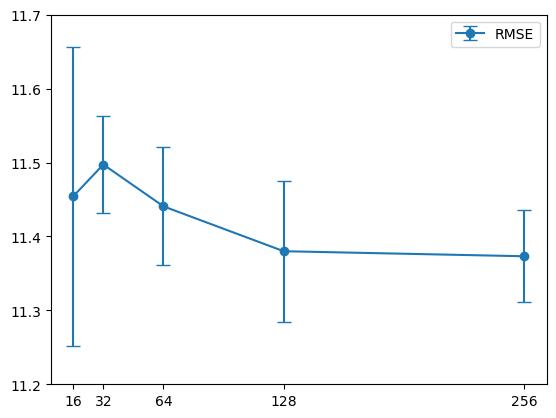

In [318]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 数据
latent_dim = [16, 32, 64, 128, 256]

# 绘制三组数据的误差线图
plt.errorbar(latent_dim, rmse_mean, yerr=rmse_std, fmt='-o', capsize=5, label='RMSE', capthick=1)
# plt.errorbar(layers, mape_mean, yerr=mape_std, fmt='-s', capsize=5, label='MAPE', capthick=1)
# plt.errorbar(layers, rmse_mean, yerr=rmse_std, fmt='-^', capsize=5, label='RMSE', capthick=1)

# 设置图表标题和坐标轴标签
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(latent_dim)
# plt.title('Error Line Chart with Multiple Series')
plt.ylim(11.2, 11.7)  # 设置y轴的范围
plt.legend()
plt.savefig('latent_dim.png', bbox_inches='tight')

In [306]:
import numpy as np

# 给定的数值
data = [11.41134739, 11.26137638, 11.30021, 11.4443121, 11.48426628]

# 计算均值
mean_value = np.mean(data)

# 计算标准差
std_value = np.std(data, ddof=1)  # 使用ddof=1得到样本标准差

print("Mean:", mean_value)
print("Standard Deviation:", std_value)



Mean: 11.380302429999999
Standard Deviation: 0.09543022609954402


## layers

In [312]:
mae = """5.1358±0.1034
4.9425±0.0886
5.2121±0.0553
5.2623±0.0773
5.2757±0.1323"""
mae_mean = []
mae_std = []

for line in mae.split('\n'):
    mean , std = line.split('±')
    mae_mean.append(float(mean))
    mae_std.append(float(std))
    
    
    
mape = """0.1082±0.0009
0.1105±0.0006
0.1101±0.0006
0.1108±0.0017
0.1119±0.0018"""
mape_mean = []
mape_std = []

for line in mape.split('\n'):
    mean , std = line.split('±')
    mape_mean.append(float(mean)*100)
    mape_std.append(float(std)*100)
    
rmse = """11.4610±0.1353
11.4973±0.0654
11.2834±0.0218
11.2902±0.0380
11.3189±0.0479"""
rmse_mean = []
rmse_std = []

for line in rmse.split('\n'):
    mean , std = line.split('±')
    rmse_mean.append(float(mean))
    rmse_std.append(float(std))

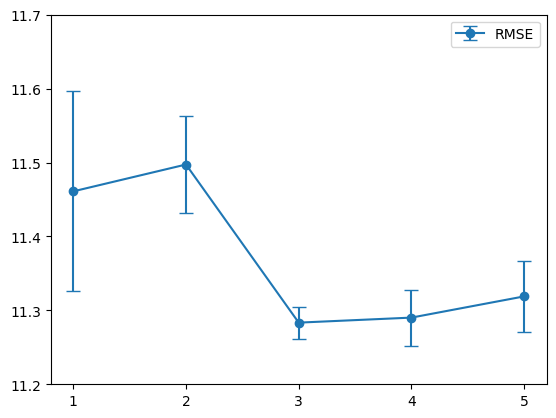

In [316]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 数据
layers = [1, 2, 3, 4, 5]

# 绘制三组数据的误差线图
plt.errorbar(layers, rmse_mean, yerr=rmse_std, fmt='-o', capsize=5, label='RMSE', capthick=1)
# plt.errorbar(layers, mape_mean, yerr=mape_std, fmt='-s', capsize=5, label='MAPE', capthick=1)
# plt.errorbar(layers, rmse_mean, yerr=rmse_std, fmt='-^', capsize=5, label='RMSE', capthick=1)

# 设置图表标题和坐标轴标签
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(layers)
plt.ylim(11.2, 11.7)  # 设置y轴的范围

# plt.title('Error Line Chart with Multiple Series')
plt.legend()
plt.savefig('layers.png', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 数据
layers = [1, 2, 3, 4, 5]

# 绘制三组数据的误差线图
plt.errorbar(layers, rmse_mean, yerr=rmse_std, fmt='-o', capsize=5, label='RMSE', capthick=1)
# plt.errorbar(layers, mape_mean, yerr=mape_std, fmt='-s', capsize=5, label='MAPE', capthick=1)
# plt.errorbar(layers, rmse_mean, yerr=rmse_std, fmt='-^', capsize=5, label='RMSE', capthick=1)

# 设置图表标题和坐标轴标签
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.title('Error Line Chart with Multiple Series')
plt.legend()
plt.savefig('a.png')

In [265]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
layers = [1, 2, 3, 4, 5]
mae_mean = [0.2, 0.3, 0.25, 0.35, 0.4]
mae_std = [0.05, 0.04, 0.05, 0.06, 0.07]

# 绘图
plt.errorbar(layers, mae_mean, yerr=mae_std, fmt='-o', capsize=5)

# 设置坐标轴标题
plt.title('MAE with Integer Ticks')
plt.xlabel('Number of Layers')
plt.ylabel('MAE')

# 使用MaxNLocator设置y轴和x轴的刻度为整数
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# 显示图表
plt.show()


(['5.0839', '4.9425', '5.0217', '5.2409', '4.9370'],
 [11.01, 11.05, 10.94, 10.86, 10.84],
 ['11.4543', '11.4973', '11.4407', '11.4557', '11.3732'],
 ['0.1123', '0.0886', '0.1436', '0.2427', '0.1548'],
 [0.13999999999999999, 0.06, 0.19, 0.22999999999999998, 0.08],
 ['0.2021', '0.0654', '0.0800', '0.2013', '0.0625'])

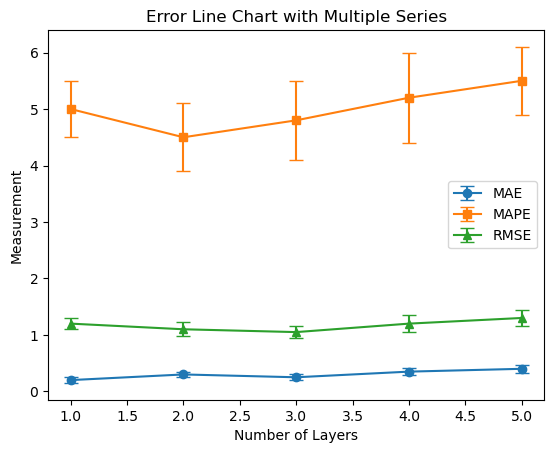

In [270]:
import matplotlib.pyplot as plt

# Sample data
layers = [1, 2, 3, 4, 5]
mae_mean = [0.2, 0.3, 0.25, 0.35, 0.4]
mae_std = [0.05, 0.04, 0.05, 0.06, 0.07]
mape_mean = [5, 4.5, 4.8, 5.2, 5.5]
mape_std = [0.5, 0.6, 0.7, 0.8, 0.6]
rmse_mean = [1.2, 1.1, 1.05, 1.2, 1.3]
rmse_std = [0.1, 0.12, 0.11, 0.15, 0.14]

# Ensure yerr is uniform in length both above and below the mean values
# For matplotlib's errorbar, yerr being a single value or a symmetric pair of values ensures this uniformity

plt.errorbar(layers, mae_mean, yerr=mae_std, fmt='-o', capsize=5, label='MAE')
plt.errorbar(layers, mape_mean, yerr=mape_std, fmt='-s', capsize=5, label='MAPE')
plt.errorbar(layers, rmse_mean, yerr=rmse_std, fmt='-^', capsize=5, label='RMSE')

# Set chart title and axis labels
plt.title('Error Line Chart with Multiple Series')
plt.xlabel('Number of Layers')  # Example of setting x-axis label
plt.ylabel('Measurement')  # Example of setting y-axis label
plt.legend()

# Save the plot
plt.savefig('error_chart_with_uniform_yerr.png')
plt.show()  # Display the plot
